In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
# !pip install seaborn


- Lasso Regression is a popular type of regularized linear regression that includes an L1 penalty. This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task. This penalty allows some coefficient values to go to the value of zero, allowing input variables to be effectively removed from the model, providing a type of automatic feature selection.
- An L1 penalty minimizes the size of all coefficients and allows some coefficients to be minimized to the value zero, which removes the predictor from the model:
$$ L1 = \sum_{j=1}^p {\rm abs}(\beta_j)~. $$
- An L1 penalty minimizes the size of all coefficients and allows any coefficient to go to the value of zero, effectively removing input features from the model.
- A consequence of penalizing the absolute values is that some parameters are actually set to 0 for some value of lambda. Thus the lasso yields models that simultaneously use regularization to improve the model and to conduct feature selection.
- This penalty can be added to the cost function for linear regression and is referred to as Least Absolute Shrinkage And Selection Operator regularization (LASSO), or more commonly, “Lasso” (with title case) for short.

### Importing Housing dataset

In [4]:
dataframe = pd.read_csv('housing.csv')

print(dataframe.shape)
print(dataframe.head())

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [86]:
# load and summarize the housing dataset
# load dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = pd.read_csv('housing.csv')
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000;
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

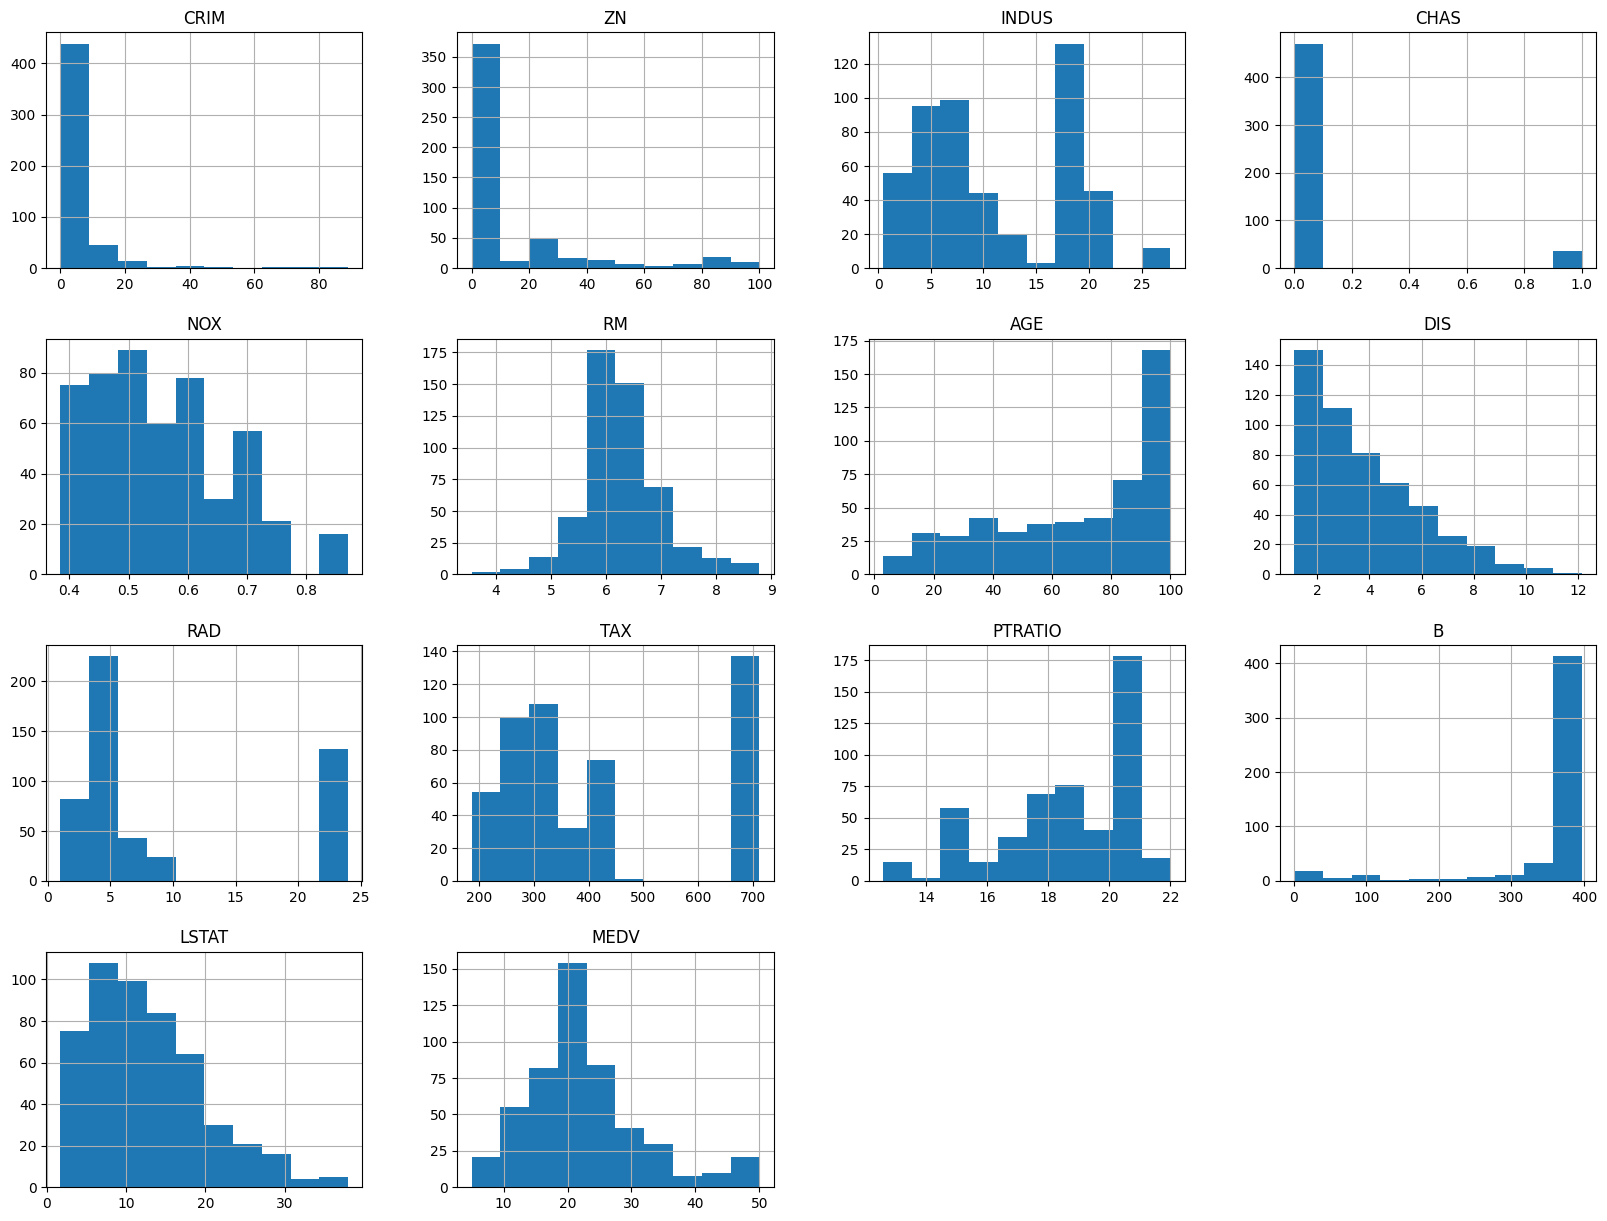

In [8]:
dataframe.hist(figsize=(20,15))

<Axes: >

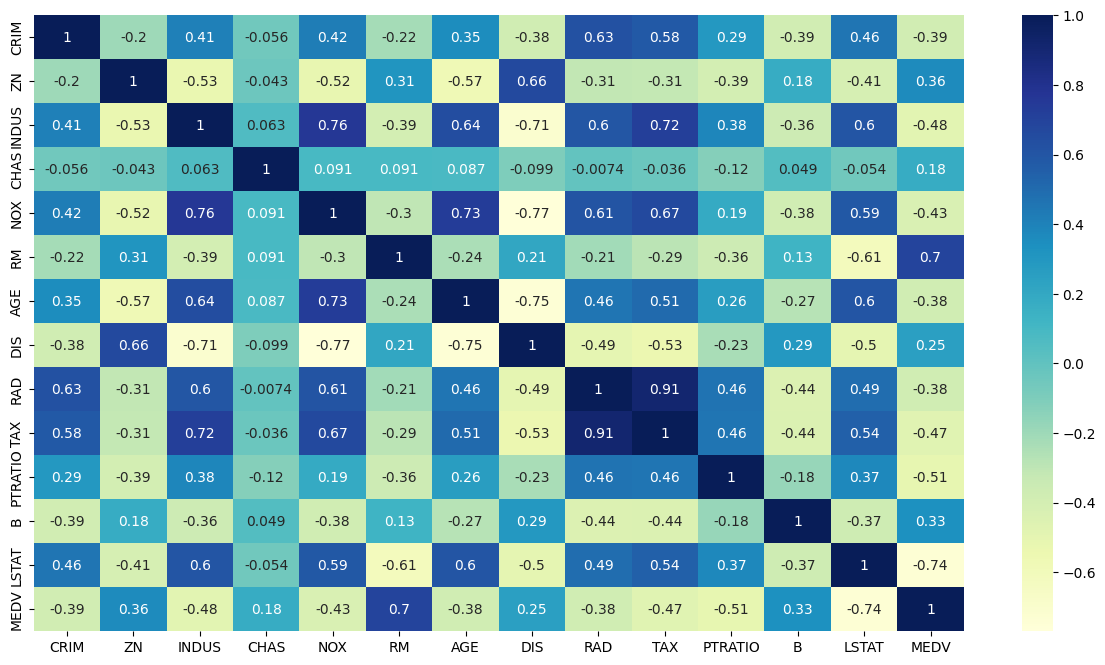

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(dataframe.corr(), annot=True, cmap="YlGnBu")

In [116]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [117]:
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (339, 13) (339,)
Test (167, 13) (167,)


In [118]:
# define model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate model
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.5f' % mae)

MAE: 3.41747


In [119]:
# R^2 coefficient
print([model.score(X_train, y_train), model.score(X_test, y_test)])

[0.7217346524579974, 0.7649416667641525]


In [120]:
residual = y_test - yhat
residual.shape

(167,)

Text(0.5, 0, 'Feature 13: LSTAT')

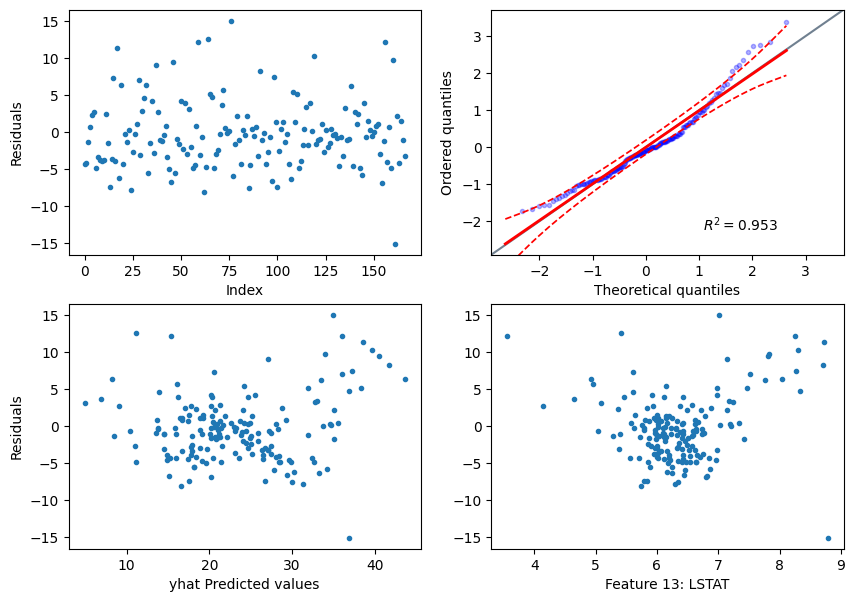

In [60]:
fig, axes = plt.subplots(2,2,figsize=(10,7))
axes[0][0].scatter([i for i in range(167)], residual, marker='.')
pg.qqplot(residual, dist='norm', confidence=.95, marker=".", ax=axes[0][1], square=False, alpha=0.3)

axes[1][0].scatter(yhat, residual, marker='.')
axes[1][1].scatter(X_test[:,6-1], residual, marker='.')

#axes[0].set_xlim([-3, 3])
#axes[0].set_ylim([-3.5, 5])
axes[0][0].set_ylabel('Residuals')
axes[0][0].set_xlabel('Index')

axes[1][0].set_ylabel('Residuals')
axes[1][0].set_xlabel('yhat Predicted values')
axes[1][1].set_xlabel('Feature 13: LSTAT')


- Finally, let us see how the parameters are accounted for in the linear regressor

<BarContainer object of 13 artists>

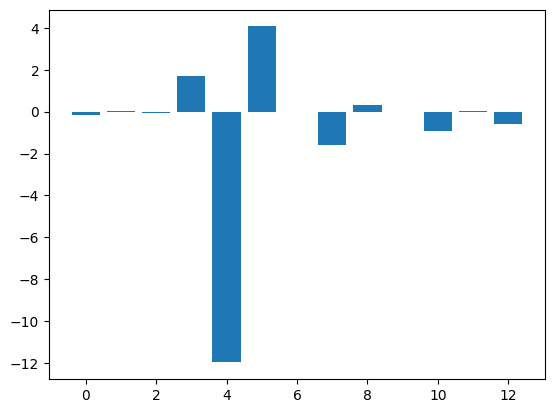

In [122]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
X1_test = sm.add_constant(X_test)
result = sm.OLS(y_test, X1_test).fit()

#print dir(result)
plt.bar([i for i in range(13)], result.params[1:])

In [123]:
result.params[1:]

array([-1.51814267e-01,  2.06975723e-02, -6.10602309e-02,  1.70408536e+00,
       -1.19812579e+01,  4.06856059e+00, -7.70881672e-03, -1.57961942e+00,
        3.12146383e-01, -1.34439665e-02, -9.27531137e-01,  1.38172729e-02,
       -5.68186983e-01])

- We see that the strongly correlated variables do not make a huge difference! So the Ridge regressor will not significantly change the result!

In [23]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [109]:
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (339, 13) (339,)
Test (167, 13) (167,)


- Confusingly, the lambda term can be configured via the “alpha” argument when defining the class. The default value is 1.0 or a full penalty.

In [25]:
# define model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate model
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.5f' % mae)

MAE: 3.37635


In [26]:
# R^2 coefficient
model.score(X_test, y_test)

0.7682741171499796

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

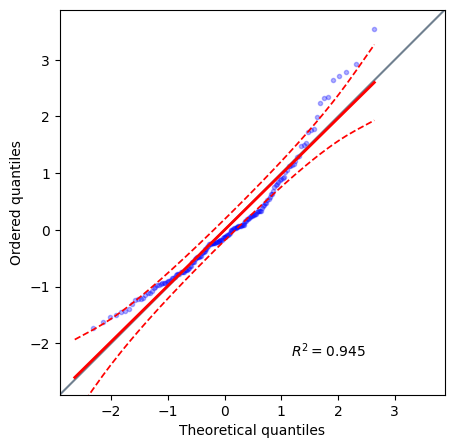

In [32]:
residual = y_test - yhat

fig, axes = plt.subplots(figsize=(10,5))
#pg.qqplot(sp_returns, dist='norm', confidence=.95, marker=".", ax=axes[0], square=False, alpha=0.3)

#axes[0].set_xlim([-3, 3])
#axes[0].set_ylim([-3.5, 5])

pg.qqplot(residual, dist='norm',  marker=".", ax=axes, confidence=.95, alpha=0.3)

In [93]:
model = Ridge(alpha=1.0)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

Mean MAE: 3.382 (0.519)


(array([1., 2., 5., 1., 5., 7., 3., 2., 3., 1.]),
 array([2.27418791, 2.49430393, 2.71441995, 2.93453597, 3.15465198,
        3.374768  , 3.59488402, 3.81500003, 4.03511605, 4.25523207,
        4.47534809]),
 <BarContainer object of 10 artists>)

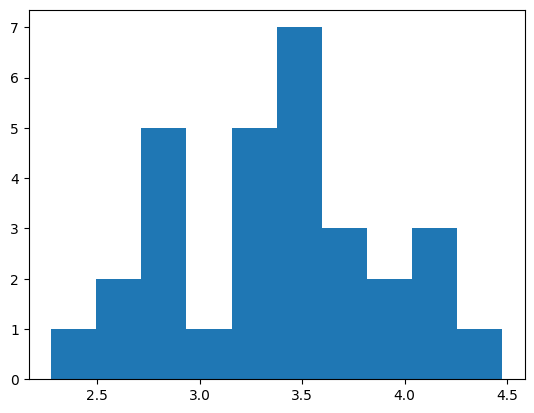

In [94]:
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
plt.hist(scores)

- If we have new data, we can also check what the model predicts.

In [18]:
model = Ridge(alpha=1.0)
model.fit(X, y)

# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]

# make a prediction
yhat = model.predict([row])

# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 30.253


In [64]:
# grid search hyperparameters for ridge regression
from sklearn.model_selection import GridSearchCV

- We define a grid to test values between 0.0 and 1.0 with a grid separation of 0.01.

In [67]:
# define model
model = Ridge()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [68]:
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.379
Config: {'alpha': 0.51}


- The scikit-learn library also provides a built-in version of the algorithm that automatically finds good hyperparameters via the RidgeCV class.
- To use this class, it is fit on the training dataset and used to make a prediction. During the training process, it automatically tunes the hyperparameter values.
- By default, the model will only test the alpha values (0.1, 1.0, 10.0). We can change this to a grid of values between 0 and 1 with a separation of 0.01 as we did on the previous example by setting the “alphas” argument.

In [88]:
# use automatically configured the ridge regression algorithm
from sklearn.linear_model import RidgeCV

In [91]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0.01, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

In [92]:
# fit model
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.510000


In [112]:
model = Ridge(alpha=0.51)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.387 (0.483)


In [113]:
model = LinearRegression()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

# evaluate model
scores1 = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores1 = absolute(scores1)
print('Mean MAE: %.3f (%.3f)' % (mean(scores1), std(scores1)))

Mean MAE: 3.399 (0.480)


Text(0.5, 0, 'Linear Regression')

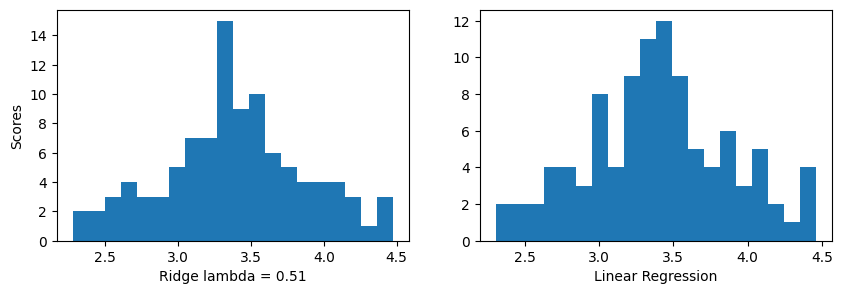

In [115]:
fig, axes = plt.subplots(1,2,figsize=(10,3))
axes[0].hist(scores, bins = 20)
axes[1].hist(scores1, bins = 20)


axes[0].set_xlabel('Ridge lambda = 0.51')
axes[0].set_ylabel('Scores')
axes[1].set_xlabel('Linear Regression')
